train is
[  0   1   2   3   4   5   6   7   8  11  12  13  14  15  16  18  19  21
  22  23  25  26  27  30  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  50  51  52  53  54  55  56  57  58  60  61  62  63
  64  65  66  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83
  84  86  88  90  92  94  95  97  99 100 101 102 104 105 107 108 109 112
 113 114 116 117 118 119 121 122 124 125 126 128 129 130 131 132 133 134
 136 137 138 139 140 141 143 144 146 147 148 149]
test is
[  9  10  17  20  24  28  29  43  49  59  67  77  85  87  89  91  93  96
  98 103 106 110 111 115 120 123 127 135 142 145]
train is
[  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  24  25  26  27  28  29  30  31  32  34  36  37  38  39  40
  41  43  44  45  46  47  49  50  51  52  53  56  57  59  60  61  62  63
  64  65  66  67  68  69  70  72  74  77  78  80  83  84  85  86  87  88
  89  91  92  93  94  96  98 100 102 103 104 106 108 109 110 111 112 11

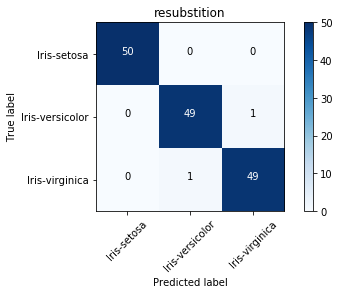

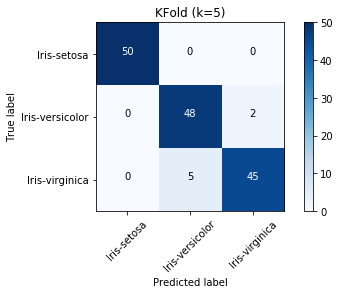

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import csv
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


k = 5

with open('./iris.data', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    feature_names = np.array(['sl', 'sw', 'pl', 'pw', 'class'])
    target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    X, Y = [], []
    for row in reader:
        X.append(row[:4])
        Y.append(row[4])
    X = np.array(X)
    Y = np.array(Y)
    # rs
    clf_rs = RandomForestClassifier(min_samples_split=3, class_weight='balanced', random_state=37, max_features=None)
    clf_rs.fit(X, Y)
    predicted_rs = clf_rs.predict(X)
    cfm_rs = confusion_matrix(Y, predicted_rs, labels=[
        'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

    # KFold
    # clf_k_fold = RandomForestClassifier(min_samples_split=3, class_weight='balanced', random_state=23)
    kf = KFold(n_splits=k, shuffle=True)
    kf.get_n_splits(X)
    cfm_KFold = np.zeros(shape=(3, 3,), dtype=np.int64)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        print('train is')
        print(train_index)
        print('test is')
        print(test_index)
        clf_KFold = RandomForestClassifier(min_samples_split=3,
                                           class_weight='balanced',
                                           random_state=23,
                                           max_features=None
                                           )
        clf_KFold.fit(X_train, Y_train)
        predicted_KFold = clf_KFold.predict(X_test)
        cfm_ThisFold = confusion_matrix(Y_test,
                                        predicted_KFold,
                                        labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
                                        )
        cfm_KFold += cfm_ThisFold
    print('Resubstitution is\n', cfm_rs)
    plt.figure()
    plot_confusion_matrix(cfm_rs,
                          classes=target_names,
                          title='resubstition')
    print('KFold is\n', cfm_KFold)
    plt.figure()
    plot_confusion_matrix(cfm_KFold,
                          classes=target_names,
                          title='KFold (k=5)')
    plt.show()